#### Problem Statement

HELP International has raised around $10 million. The CEO needs to decide how to use this money strategically and effectively. You have been provided with a dataset named **`"country_data.csv"`**, which includes various features. The dataset comprises the following columns:

  - `country`: Name of the country.
  - `child_mort`: Child mortality rate, the number of deaths of children under 5 years of age per 1000 live births.
  - `exports`: Exports of goods and services as a percentage of the country's GDP.
  - `health`: Health expenditure as a percentage of the country's GDP.
  - `imports`: Imports of goods and services as a percentage of the country's GDP.
  - `income`: Net income per person in USD.
  - `inflation`: The rate at which the general level of prices for goods and services is rising, and subsequently, purchasing power is falling(%).
  - `life_expec`: Life expectancy at birth, indicating the number of years a newborn is expected to live.
  - `total_fer`: Total fertility rate, the average number of children that would be born to a woman over her lifetime.
  - `gdpp`: GDP per capita in USD, representing the average economic output per person.

As a data scientist / AI engineer, your task is to use this dataset to categorize / cluster the countries using socio-economic and health factors that determine the overall development of the country.

In [5]:
# Importing all necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Data Preparation and Exploration

In [7]:
# Import the dataset
df = pd.read_csv("country_data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.shape

(167, 10)

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


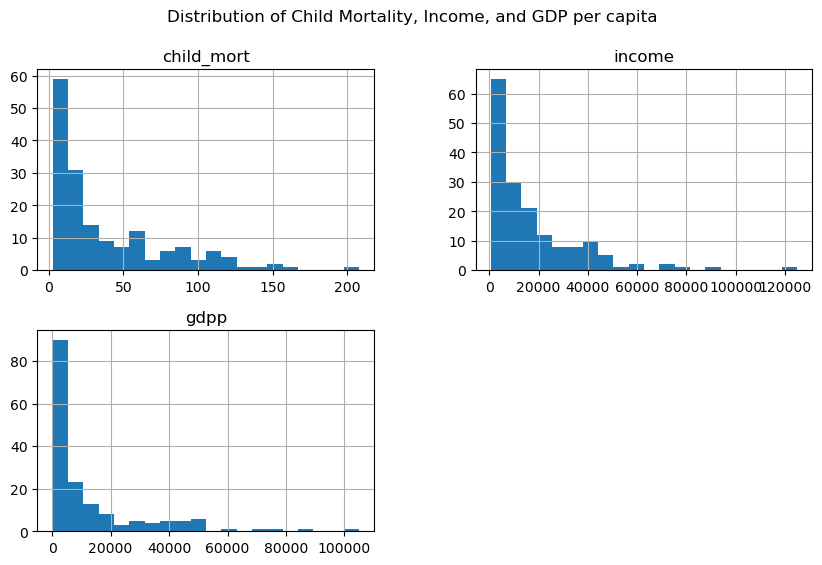

In [10]:
# Visualize the distribution of 'child_mort', 'income', and 'gdpp'
df[['child_mort', 'income', 'gdpp']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Child Mortality, Income, and GDP per capita')
plt.show()

### Scaling

In [13]:
# Drop the 'country' column since it's not a numerical feature
df_cluster1 = df.drop('country', axis=1)

# Standardize the numerical features
scaler = StandardScaler()
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_cluster1[features] = scaler.fit_transform(df_cluster1[features])

df_cluster1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# K- Means clustering

In [15]:
# Perform KMeans clustering withh n_clusters as 4
km = KMeans(n_clusters=4, n_init='auto')

# Fit the KMeans model to the data (df_cluster1)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

KMeans(n_clusters=4)

In [16]:
km.inertia_

760.1531865934846

In [17]:
km.cluster_centers_

array([[-0.83000679,  0.63382985,  0.7674502 ,  0.19133932,  1.49103941,
        -0.49784881,  1.09287988, -0.79958564,  1.65007148],
       [ 0.48406464, -0.27841301, -0.61187759, -0.67628747, -0.3828263 ,
         5.24257153, -0.35967066,  0.46513754, -0.37234597],
       [-0.41216914, -0.0202794 , -0.23127558,  0.01928437, -0.2265676 ,
        -0.09732051,  0.27994301, -0.44514863, -0.34364826],
       [ 1.30629603, -0.41884883, -0.12894738, -0.13296451, -0.69062463,
         0.20589948, -1.27930022,  1.34238878, -0.60545333]])

### Elbow Method for Determining Optimal Clusters

In [19]:
sse = []
k_rng = range(4, 15)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_cluster1)
    sse.append(km.inertia_)

print(sse)

[817.2383194185447, 730.6798011249175, 598.6927691984542, 551.9688644592716, 464.56432009302523, 433.83745414899454, 400.9896898730733, 388.7716590712993, 377.5706726211323, 337.5049693709059, 327.1398954269881]


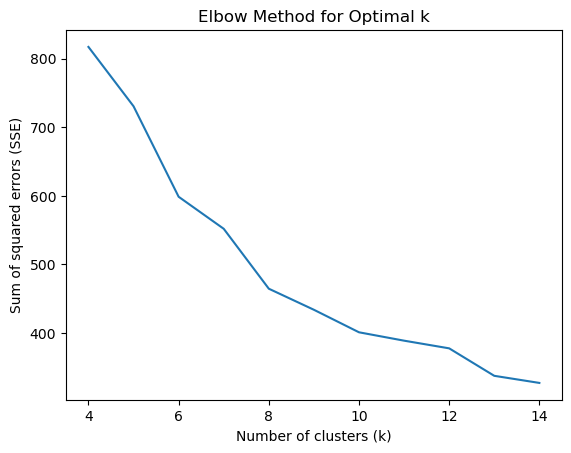

In [20]:
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

Based on the Elbow Method graph, the optimal number of clusters appears to be 6. 

In [22]:
# Train the KMeans model using the number of clusters 6 identified by the Elbow Method.

# Perform KMeans clustering withh optimal n_clusters
km = KMeans(n_clusters=6, n_init='auto')

# Fit the KMeans model to the data (df_cluster)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

#assigning the cluster values
df['Cluster'] = km.labels_

In [23]:
km.inertia_

550.9303043026612

In [24]:
km.cluster_centers_

array([[ 1.38751055e+00, -4.66594106e-01, -1.37846584e-01,
        -1.35937546e-01, -7.12225760e-01,  1.84001233e-01,
        -1.31560053e+00,  1.37313929e+00, -6.16446788e-01],
       [-2.59058209e-01, -4.06957699e-01, -5.45495202e-01,
        -6.69524901e-01, -2.14240861e-01,  4.38625787e-01,
         2.04827732e-01, -2.57897034e-01, -3.67889527e-01],
       [-8.49003244e-01,  4.93567278e+00, -8.16303241e-03,
         4.54805768e+00,  2.43954240e+00, -5.04206141e-01,
         1.22682431e+00, -1.03886271e+00,  2.44079735e+00],
       [-5.16465812e-01,  3.39886090e-01,  4.45159311e-02,
         5.71230357e-01, -2.17389782e-01, -3.69478085e-01,
         2.82446261e-01, -5.24984917e-01, -3.02523395e-01],
       [-8.28609295e-01,  1.72620657e-01,  8.59189773e-01,
        -2.96372763e-01,  1.46227512e+00, -4.78188511e-01,
         1.10764922e+00, -7.63681462e-01,  1.66190214e+00],
       [ 2.28138502e+00, -5.78451631e-01, -6.37438082e-01,
        -1.22178479e+00, -6.24064774e-01,  9.129718

### Hierarchical Clustering

In [26]:
hc = AgglomerativeClustering(n_clusters=6, metric='cosine', linkage='complete')
hc.fit(df_cluster1)

#Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
df['Cluster_HC'] = hc.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster_HC
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,5
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0


# Plot Dendrogram

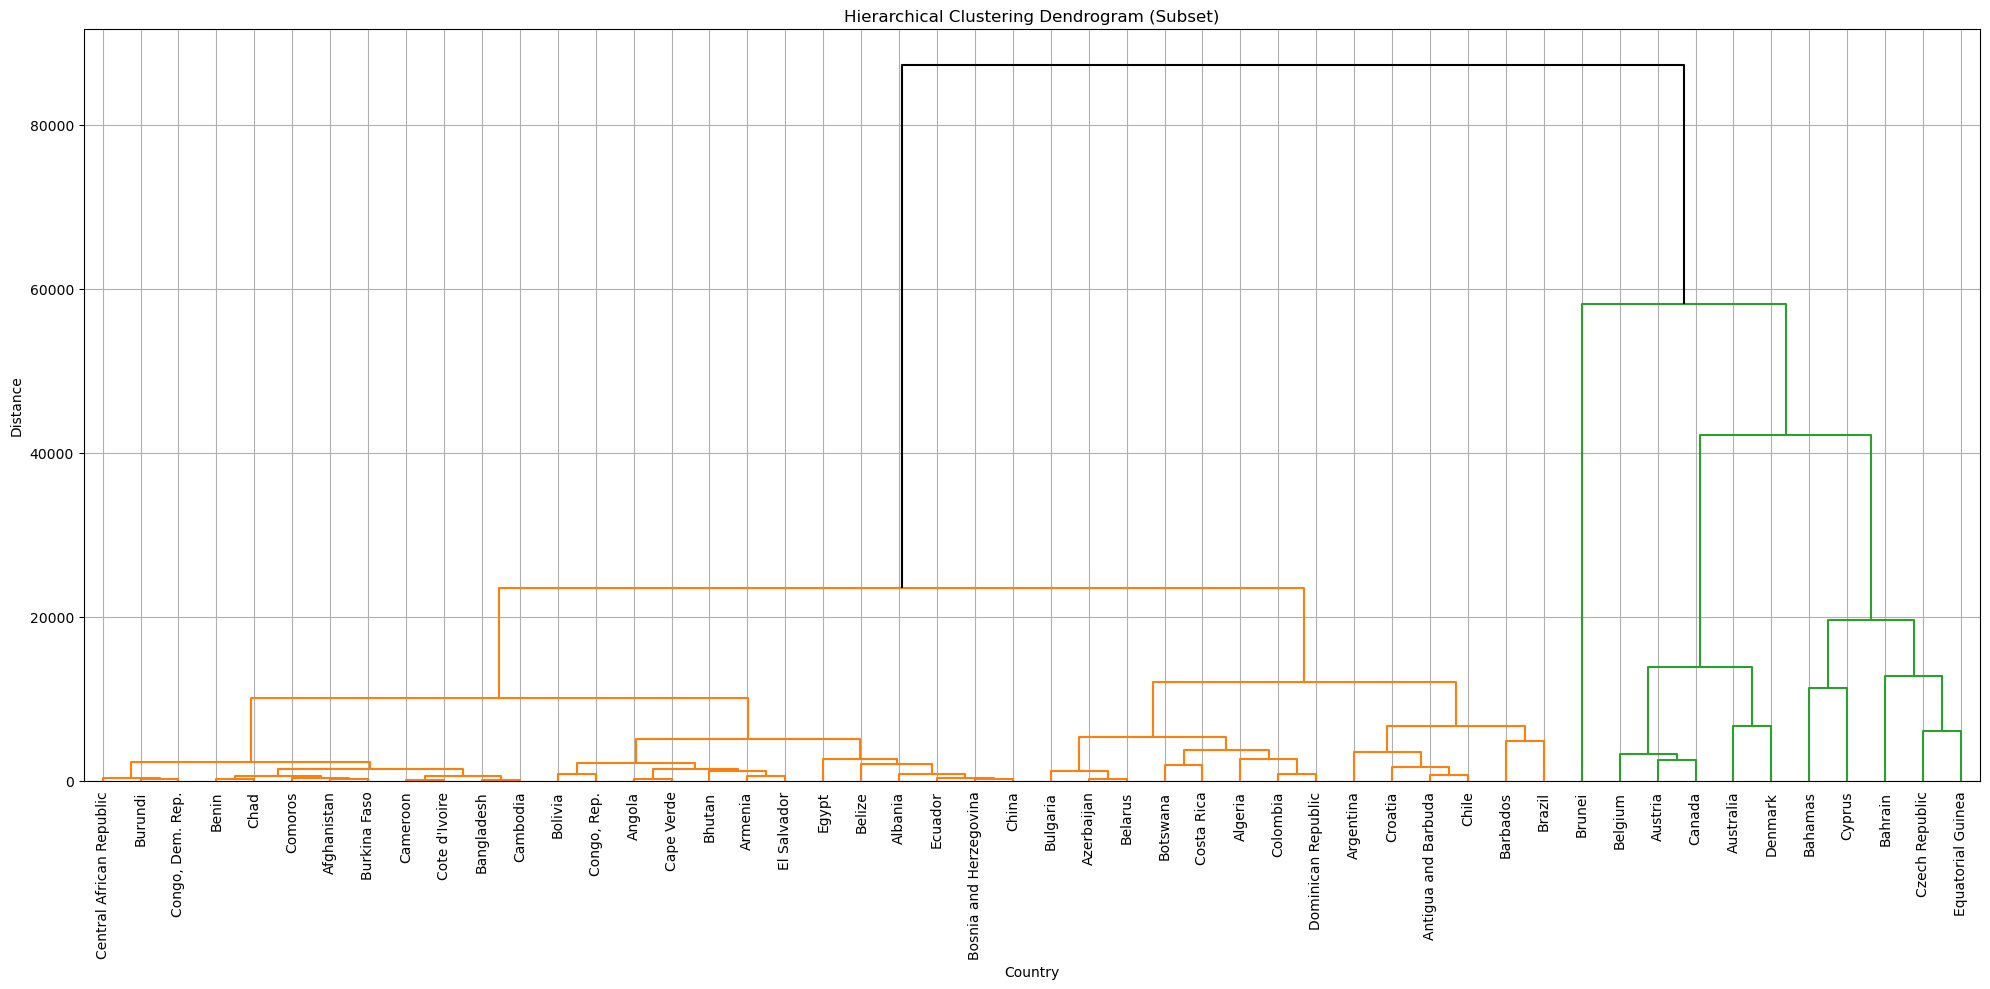

In [28]:
# Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points
subset_df = df.iloc[:50]
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
X_subset = subset_df[features]

# Perform hierarchical/agglomerative clustering on subset
Z_subset = linkage(X_subset, method='complete')  

# Plotting the dendrogram for subset
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Subset)')
dendrogram(Z_subset, labels=subset_df['country'].values, leaf_rotation=90, leaf_font_size=10, above_threshold_color='black')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()